In [1]:
import sys
sys.path.append("../")
import torch
from solver.vanilla_sinkhorn_solver import VanillaSinkhornSolver
from solver.utils import generate_measure
torch.set_printoptions(8)
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def distmat(Y,X):
    return torch.sum(X**2,0)[:,None] + torch.sum(Y**2,0)[None,:] - 2*X.transpose(0,1) @ Y

In [3]:
n = 6 # number samples
d = 2 # dimension

# random points
torch.manual_seed(12)
X = torch.randn(d,n)*.3

# curve
n = 30
t = torch.linspace(0,1-1/n,n)[None,:]
eta = .5
X = torch.cat( (torch.cos(2*np.pi*t),eta*torch.sin(2*np.pi*t)), 0 )

a = torch.ones(n)/n
Y = X
b = a
CX = distmat(X,X)
CY = distmat(Y,Y)

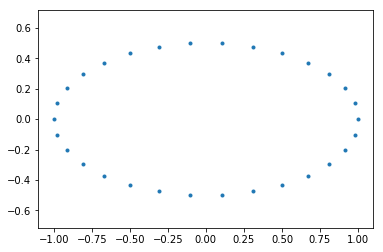

In [114]:
plt.plot(X[0,:].numpy(), X[1,:].numpy(), '.')
plt.axis('equal');
#plt.imshow(CX)

In [127]:
# Set up a solver for KL-(U)GW
# Set rho=None to run balanced GW computation
epsilon = 0.001
epsilon = 0.001

pi0 = torch.rand((n,n))
pi0 = pi0/torch.sum(pi0)

solv = VanillaSinkhornSolver(nits_plan=1000, nits_sinkhorn=1000, gradient=False, tol_plan=1e-5, tol_sinkhorn=1e-5,
                             eps=epsilon, rho=float("Inf"))
pi, gamma = solv.alternate_sinkhorn(a, CX, b, CY, init=pi0)
cost = solv.ugw_cost(pi, gamma, a, CX, b, CY)

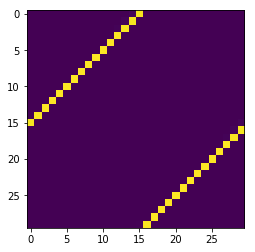

In [128]:
pl.imshow(pi)